In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data1 = pd.read_csv("project3_dataset1.txt",sep="\t", header=None)
data2 = pd.read_csv("project3_dataset2.txt",sep="\t", header=None)

In [ ]:
def one_hot(row):
    return int(row[4]=='Present')
data2[4] = data2.apply(lambda row:one_hot(row), axis=1)
data2

0     1      2      3  4   5      6      7   8  9
0    132  6.20   6.47  36.21  1  62  30.77  14.14  45  0
1    123  0.05   4.61  13.69  0  51  23.23   2.78  16  0
2    128  0.50   3.70  12.81  1  66  21.25  22.73  28  0
3    114  9.60   2.51  29.18  0  49  25.67  40.63  46  0
4    150  0.30   6.38  33.99  1  62  24.64   0.00  50  0
..   ...   ...    ...    ... ..  ..    ...    ...  .. ..
457  114  4.08   4.59  14.60  1  62  23.11   6.72  58  1
458  136  2.80   2.53   9.28  1  61  20.70   4.55  25  0
459  138  4.50   2.85  30.11  0  55  24.78  24.89  56  1
460  170  7.60   5.50  37.83  1  42  37.41   6.17  54  1
461  128  0.00  10.58  31.81  1  46  28.41  14.66  48  0

[462 rows x 10 columns]

In [ ]:
print(data1.shape)
print(data2.shape)

X1 = data1[[i for i in range(data1.shape[1]-1)]].to_numpy()
y1 = data1[[ data1.shape[1]-1 ]].to_numpy()

X2 = data2[[i for i in range(data2.shape[1]-1)]].to_numpy()
y2 = data2[[ data2.shape[1]-1 ]].to_numpy()

# X1 = np.hstack(( np.ones([len(X1), 1]), X1))
# X2 = np.hstack(( np.ones([len(X2), 1]), X2))



(569, 31)
(462, 10)


In [ ]:

def run_PCA(trainX):
    trainXMean = np.mean(trainX, axis=0)
    X = trainX - trainXMean
    X = X.T
    d, n = X.shape
    cov = (X @ X.T)/(n-1)

    w, V = np.linalg.eig(cov)

    w = np.real(w)
    V = np.real(V)
    return w, V

def get_PCA_data(trainX, V, PC):
    trainXpc = []
    for i in range(len(trainX)):
        row = []
        sample = trainX[i]
        for m in range(PC):
            row.append(np.dot(sample, V[m]))
        trainXpc.append(row)
    return np.array(trainXpc)


In [ ]:

from sklearn.preprocessing import MinMaxScaler

def transform_PCA(X1):
    w1, V1 = run_PCA(X1)
    X1_pca = get_PCA_data(X1, V1, 3)

    mms = MinMaxScaler()
    X1_pca = mms.fit_transform(X1_pca)

    return X1_pca

X1_pca = transform_PCA(X1)
X2_pca = transform_PCA(X2)

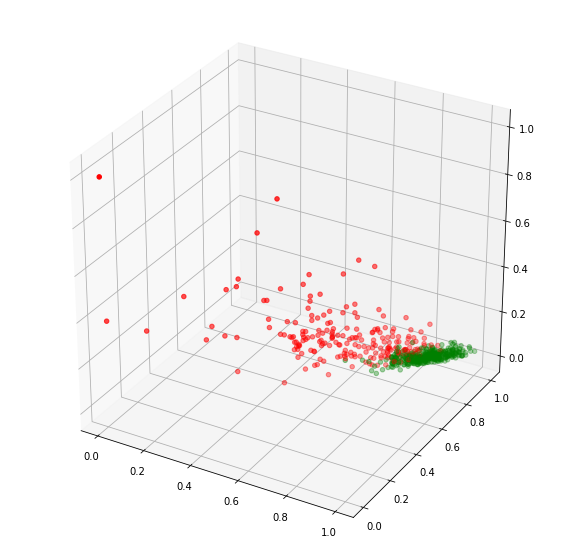

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
clrs = [('r' if y1[i]==1 else 'g') for i in range(len(y1))]
ax.scatter(X1_pca[:, 2], X1_pca[:, 1], X1_pca[:, 0], c=clrs, marker='o')
plt.show()

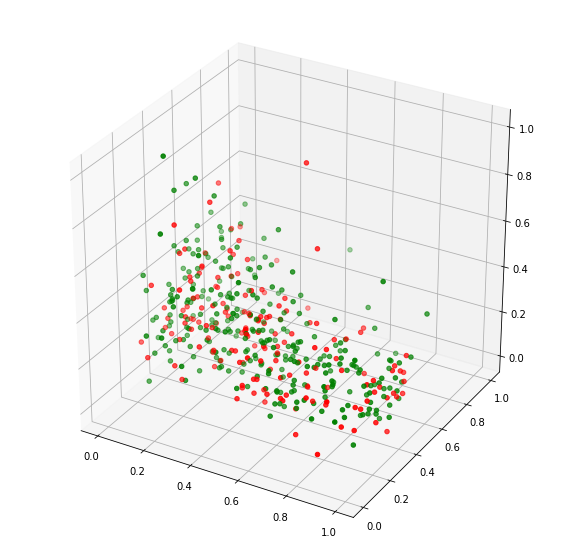

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
clrs = [('r' if y1[i]==1 else 'g') for i in range(len(y2))]
ax.scatter(X2_pca[:, 2], X2_pca[:, 1], X2_pca[:, 0], c=clrs, marker='o')
plt.show()